# Code Modifications Tutorial

Before starting this tutorial, you should familiarize yourself with Git and GitHub.

Git is an open-source version control software to track your changes in the source code. 

GitHub provides a centralized online service to host the source code and version control using Git.

This tutorial provides a hands-on tutorial for Git and GitHub: 
https://swcarpentry.github.io/git-novice/

It is recommended that you go through the first tutorial (`NEON_Simulation_Tutorial.ipynb`) and run the simulations using the original code, so you can compare the results of the modified code with the original code. 

---
**Warning**

> You should already have some familiarity with CTSM workflow, before attempting any code modifications. 

---



## 1- Create a fork from CTSM repository
For saving your progress via GitHub you need to create your own `fork` of the CTSM repository. 

---
**NOTE**

> A `fork` is a copy of a repository. Forking a repository allows you to freely experiment with changes without affecting the original project.
> A normal user will not have the access to write to the CTSM original repository. Therefore, you need to create your own repository by forking the original repository to push your changes. 

---

You can create your own fork of the CTSM repository by using the fork button in the upper right corner of the [CTSM reository page](https://github.com/ESCOMP/CTSM).  

* Login to your GitHub account
* Navigate to the original [CTSM repository](https://github.com/ESCOMP/CTSM) (`escomp/CTSM`) 
* Use the `fork` button to create a fork of CTSM repository in your account

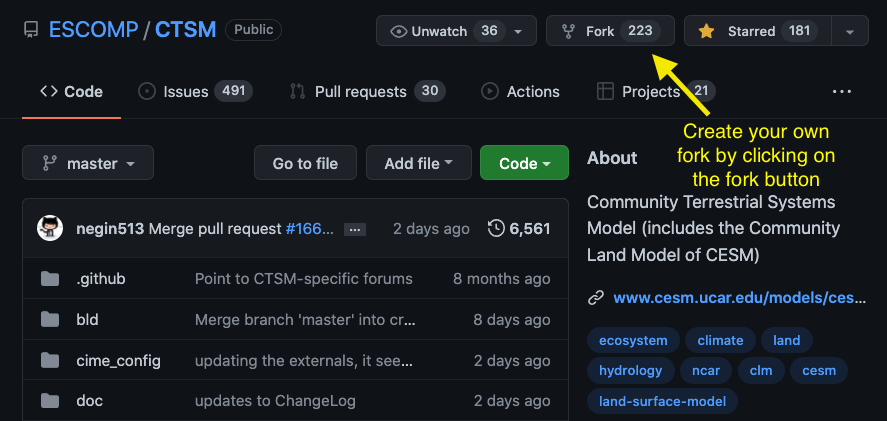






Your forked repository will be under your account name:

https://github.com/YOUR-USER-NAME/CTSM

For example, for the username (`negin513`) the forked repo is:

https://github.com/negin513/CTSM


You can make any modifications you'd like to your repository. 


## 2- Setting Up Git and GitHub on your machine

When using Git and GitHub on a new computer/machine you need to configure a few settings. 

If you have already done this step, you don't need to repeat this step. 

You might need to setup your name and email for git/github for the first time in the container.

```
git config --global user.name "John Doe"
git config --global user.email johndoe@example.com
```

Now that you have set up everything you can start downloading and modifying your code in the container. 

## 3- Clone your forked repository 

In this step, you need to `clone` your own fork, so you can edit it locally in the container. 

---
**NOTE**

> A `clone` of a repository is a full copy of all the repository data from GitHub. When you `clone` a repository, you copy the repository from GitHub.com to your local machine (the container here). 
---



From step one you can remember that your forked repository is be under `https://github.com/YOUR-USER-NAME/CTSM`. 


Clone your own fork from github by using `git clone https://github.com/YOUR-USER-NAME/CTSM` :

In [4]:
git clone https://github.com/negin513/ctsm.git

Cloning into 'ctsm'...
remote: Enumerating objects: 62275, done.
remote: Counting objects: 100% (1639/1639), done.
remote: Compressing objects: 100% (581/581), done.
remote: Total 62275 (delta 1114), reused 1485 (delta 1026), pack-reused 60636
Receiving objects: 100% (62275/62275), 29.94 MiB | 17.88 MiB/s, done.
Resolving deltas: 100% (47069/47069), done.


Now, go into the cloned repository

In [2]:
cd ctsm
pwd

/Users/negins/Desktop/Simulations/tutorials/ctsm


Run `manage_externals` to checkout all the external packages needed for running CTSM:

In [3]:
./manage_externals/checkout_externals

Processing externals description file : Externals.cfg
Processing externals description file : Externals_CLM.cfg
Processing externals description file : Externals_CISM.cfg
Processing externals description file : Externals_CDEPS.cfg
Checking status of externals: clm, fates, cism, source_cism, rtm, mosart, mizuroute, ccs_config, cime, cmeps, cdeps, fox, genf90, cpl7, share, mct, parallelio, doc-builder, 
Checking out externals: clm, Processing externals description file : Externals_CLM.cfg
Checking out externals: fates, 
ccs_config, cime, cdeps, Processing externals description file : Externals_CDEPS.cfg
Checking out externals: fox, genf90, 
cism, Processing externals description file : Externals_CISM.cfg
Checking out externals: source_cism, 
cmeps, cpl7, mizuroute, mosart, rtm, mct, parallelio, share, 



Check the contents of your directory:

In [4]:
ls

CODE_OF_CONDUCT.md        README_EXTERNALS.rst      manage_externals
CONTRIBUTING.md           bld                       parse_cime.cs.status
Externals.cfg             ccs_config                python
Externals_CLM.cfg         cime                      run_sys_tests
LICENSE                   cime_config               share
README                    components                src
README.CHECKLIST.new_case doc                       test
README.NUOPC_driver.md    libraries                 tools
README.md                 lilac


By default, when you clone a repository you will be on `master` or `main` branch of the repository.

In [20]:
git status

On branch develop
Untracked files:
  (use "git add <file>..." to include in what will be committed)
	../biogeochem/.ipynb_checkpoints/
	.ipynb_checkpoints/

nothing added to commit but untracked files present (use "git add" to track)


---
**NOTE**

> A `branch` of a repository is a copy of the original `main` branch (similar to branches in a tree). Branches allow you to preserve the main code (the 'main'  branch), make a copy (a new branch) and then work within that new branch.
---


* Next create a branch for your development called (`develop`):

In [12]:
git checkout -b develop

Switched to a new branch 'develop'


In [13]:
git status

On branch develop
Untracked files:
  (use "git add <file>..." to include in what will be committed)
	src/main/.ipynb_checkpoints/

nothing added to commit but untracked files present (use "git add" to track)


## 4- Make your code modifications:

Now that you have a copy of the code (`clone`) in your machine you can start changing the code. 

In this tutorial we are going to change the rain threshhold for leaf onset and compare the results for KONZ site.  

Note:  

---
**NOTE**

If you are interested in comparing the results from modified code with original code, you should make sure to run original CTSM for your tower of interest.>

---

Quesion: Where is KONZ site located? What kind of behavior do we expect by changing the rain threshhold for leaf onset? 
To find more information about KONZ site, please NEON's website: https://www.neonscience.org/field-sites/konz


In this example, we are making these code modifications in `src/biogeochem/CNPhenologyMod.F90`. First we should navigate to the directory:

In [16]:
cd src/biogeochem


From your side bar open up the files you'd like to modify by double clicking on the file.

Here we are modifying `rain_threshold` in `src/biogeochem/CNPhenologyMod.F90`. Open up the `CNPhenologyMod.F90` file by double clicking on the file:

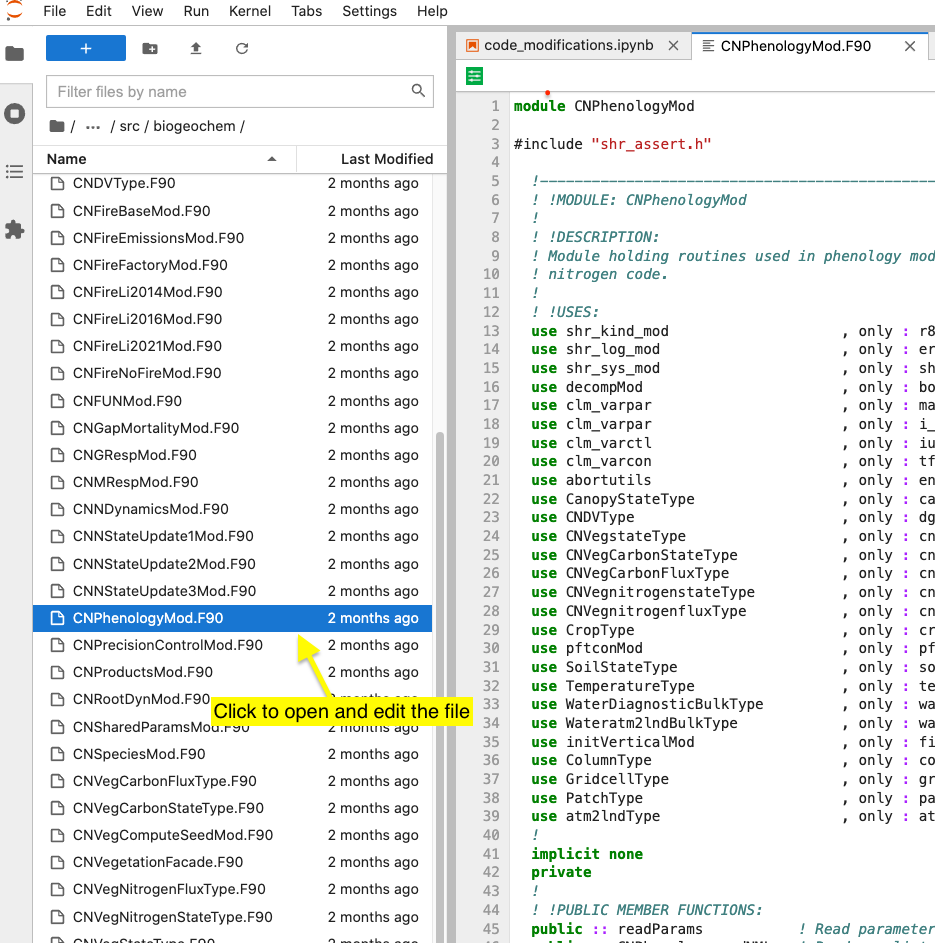



It will open up the file under another tab:

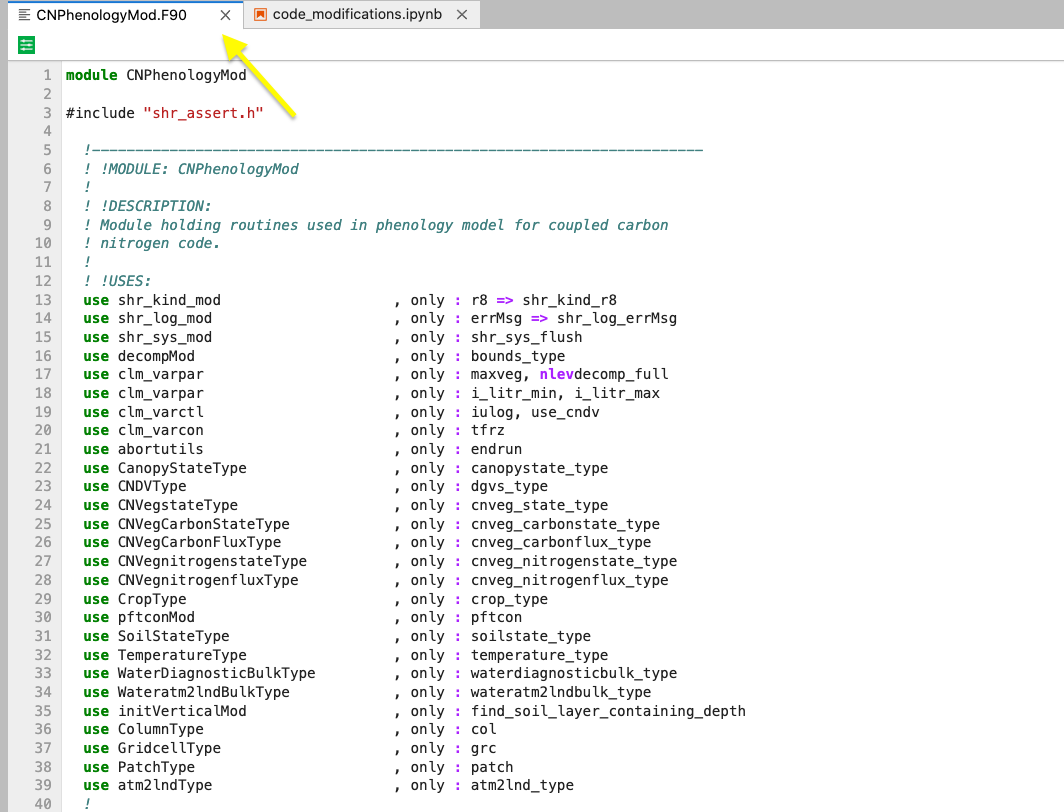



**Question:**
* Can you find what is the current value of `rain_threshhold`?

**Answer:**

The current value of `rain_threshold` is 20 as specified in the code:

```
rain_threshold = 20._r8 
```
Now you can change the `rain_threshhold` to a lower or a higher value. 

For example:  the following modification will set the rain threshhold for leaf onset to 1mm. 
```
rain_threshold = 1._r8 

```
Make sure to save before closing the files by clicking the save button from the top toolbar.



**Question:**
* How do you think changing this value will impact your simulations?

 




We can navigate back and run CTSM for our NEON case KONZ with these modifications. 

But first we should save our previous simulation, otherwise it is going to be overwritten.

For saving the old simulations, we can rename the archive directory:

In [ ]:
mv archive archive_original

Next you can run the simulation again with the modified code:

In [ ]:
./run_neon --neon-site KONZ --overwrite

Next, you can visualize the output of original simulation vs the modified code. 

For example, the following plot shows GPP for the simulations resulting from changing `rain_threshold` to 1mm and 200mm agains neon observation. 


**Question:** Can you explain how changing the threshhold changed GPP in this plot? 

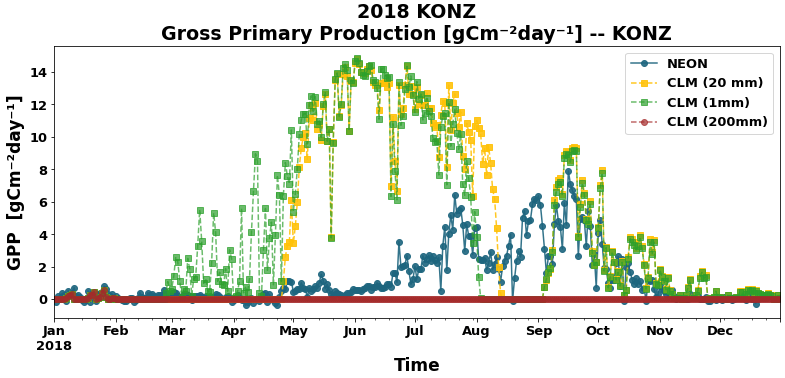

## 5- Save your changes to your github repository

When you are happy with your changes, you should make sure you have submitted these changes to your GitHub repository. 

Easiest way to do so:


First run the following to find all the files that has been modified. You should see all the modified files here. 

In [9]:
git status

On branch developments
nothing to commit, working tree clean


Next add these file (or all files) to be saved:

In [11]:
git add . 

Next commit your changes using a meaningful commit message:

In [ ]:
git commit -m " meaningful commit message"

Finally push your changes to the remote repository:

In [ ]:
git push

To see your changes now you can go to your own fork and your own branch on github.com and see your recent changes. 

## 6- Run CTSM using your modifications. 

In this step, you will test your modifications by running your own code.

You can do so by either:
1- Using `./run_neon.py` script. (easiest method)
2- Following the steps for running an unsuported single point case. 

For example for testing your code using `./run_neon.py`:
First, go back to top level repository.

In [ ]:
cd ~/tutorial

Next, run `run_neon.py` to run CTSM for a neon site.

Do we want to add a meaningful plot, analysis here so they can check it out?

Some notes / thoughts
* If they have already run the first tutorial, telling them to save the original run (if they have already run it)... mv archive/abby to archive/abby_original
    * git checkout master
    * run_neon.py (with the original)
* run run_neon.py again and it will save to archive/abby now. 

* add one plot that shows the comparison between the original and modified code. 